In [4]:
#הגדרות בסיסיות (בררות מחדל)
mass_1 = 1
mass_2 = 1
lenght_1 = 1
lenght_2 = 1
angle_1 = 90
angle_2 = 90
angular_velocity_1 = 0
angular_velocity_2 = 0
delta_time = 0.01
gravity = 9.7801
long_time_extend = 10
short_time_extend = int(2/delta_time)

In [5]:
#פונקציה זאת מחשבת לנו את מיקום המטוטלות בכל רגע
#לפי אורכי המטוטלות והזוויות בין המטוטלות לאנך, נשתמש בפונקציה זאת בהמשך
from math import *
def get_location(l1,l2,d1,d2):
    '''(number, number,number, number)-->(number, number, number, number)
    the function gives you the locations of the pendulum
    >>>get_location(1,1,45*pi/180,45*pi/180)
    (0.7071067811865475, -0.7071067811865476, 1.414213562373095, -1.4142135623730951)'''
    
    x1 = l1*sin(d1)#מחשב את מיקום מטוטלת מספר 1 בציר איקס
    x2 = l1*sin(d1)+l2*sin(d2)#מחשב את מיקום מטוטלת מספר 2 בציר איקס
    y1 = -l1*cos(d1)#מחשב את מיקום מטוטלת מספר 1 בציר וואי
    y2 = -l1*cos(d1)-l2*cos(d2)#מחשב את מיקום מטוטלת מספר 2 בציר וואי
    
    return x1,y1,x2,y2#מחזיר את מיקומם של המטוטלות


In [6]:
#:פונקציה זאת מחזירה לנו רשימות של 
#המהירויות הזויתיות, מיקומי המטוטלות והזוויות בין המטוטלות לאנך בכל רגע 
def get_angular_velocity(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t):
    '''(number, number,number, number,number, number,number, number,number, number,number)-->
    (list, list, list, list, list, list, list, list)
    the function gives you the: angular velocity, location and the angle of the pendulums
    >>>get_angular_velocity(1,1,1,1,45,45,0,0,0.5,10,1)
    ([0, -3.535533905932737],
    [0, 0.0],
    [0.7071067811865475, -0.831814508429051],
    [1.414213562373095, -0.12470772724250356],
    [-0.7071067811865476, -0.555053712326056],
    [-1.4142135623730951, -1.2621604935126036],
    [0.7853981633974483, -0.9823687895689202],
    [0.7853981633974483, 0.7853981633974483])'''
    
    d1 = d10*pi/180#ממיר זוויות לרדיאנים
    d2 = d20*pi/180
    
    w1 = w01#(רק פעם אחת)משווה משתנים למהירויות הזוויתיות ההתחלתית
    w2 = w02
    
    lw1 = []#יוצר רשימות של התוצאות
    lw2 = []
    
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    
    ld1 = []
    ld2 = []
    
    for i in range(int(t/dt)):
        #לולאה החוזרת על עצמה ככמות הזמן שאנו רוצים לקבל חלקי השינוי בזמן (רמת הדיוק)
    
        ww1 = (-g*(2*m1+m2)*sin(d1) - m2*g*sin(d1 - 2*d2) - 2*sin(d1 - d2)*m2*(w2**2*l2 + w1**2*l1*cos(d1 - d2)) )/(l1*(2*m1 + m2 - m2*cos(2*d1 - 2*d2)) )
        #מחשב את התאוצה הזוויתית של המטוטלת הראשונה
        ww2 = (2*sin(d1-d2)*(w1**2*l1*(m1 + m2) + g*(m1 + m2)*cos(d1) + w2**2*l2*m2*cos(d1 - d2)) )/(l2*(2*m1 + m2 - m2*cos(2*d1 - 2*d2)) )
        #מחשב את התאוצה הזוויתית של המטוטלת השנייה
        
        x1.append(get_location(l1,l2,d1,d2)[0])#מזמן את מיקומי המטוטלות מהפונקציה הראשונה
        x2.append(get_location(l1,l2,d1,d2)[2])
        y1.append(get_location(l1,l2,d1,d2)[1])
        y2.append(get_location(l1,l2,d1,d2)[3])
        
        ld1.append(d1)#מוסיף נתונים לתוצאות
        ld2.append(d2)
        
        d1 = ww1/2*dt**2+w1*dt+d1#מחשב את המשתנים החדשים
        d2 = ww2/2*dt**2+w2*dt+d2
        
        lw1.append(w1)#מוסיף נתונים לתוצאות
        lw2.append(w2)
        
        w1 = ww1*dt+w1#מחשב את המשתנים החדשים
        w2 = ww2*dt+w2
        
        
    return lw1 , lw2 , x1 , x2 , y1 , y2 , ld1 , ld2#מחזיר את התוצאות

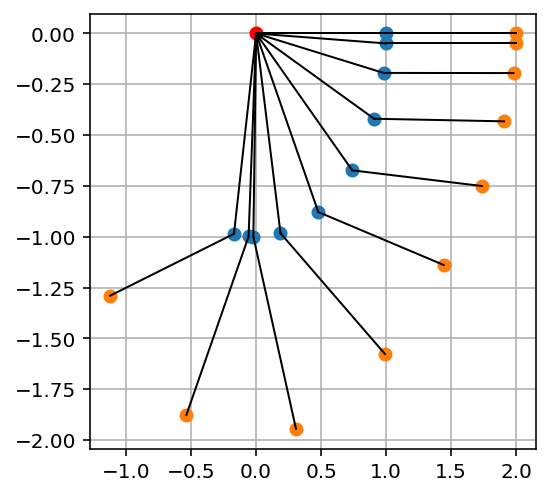

In [9]:
#בחלק זה הצבנו את התוצאות של הפונקציה הקודמת בגרף ויצרנו תמונות זמן של המטוטלת כדי לבדוק האם הפונקציה עובדת
import matplotlib.pyplot as plt
movement = get_angular_velocity(mass_1,mass_2,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time*10,gravity,1)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) מציבים את פרמטרים לפונקציה הקודמת
x1 = movement[2]#מזמנים את מקומי המטוטלות בכל רגע
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
plt.figure(figsize = (4,4))#מעצבים את הגרף
plt.grid(True)
plt.plot(0 , 0 ,'ro')
plt.plot(x1 , y1 ,'o')
plt.plot(x2 , y2 ,'o')
for i in range(len(x1)):
    plt.plot([x1[i], x2[i]],[y1[i], y2[i]] ,c = 'k', lw =1)
    plt.plot([0, x1[i]],[0, y1[i]] ,c = 'k', lw =1)

Text(0.5, 1.0, '2 seconds graph')

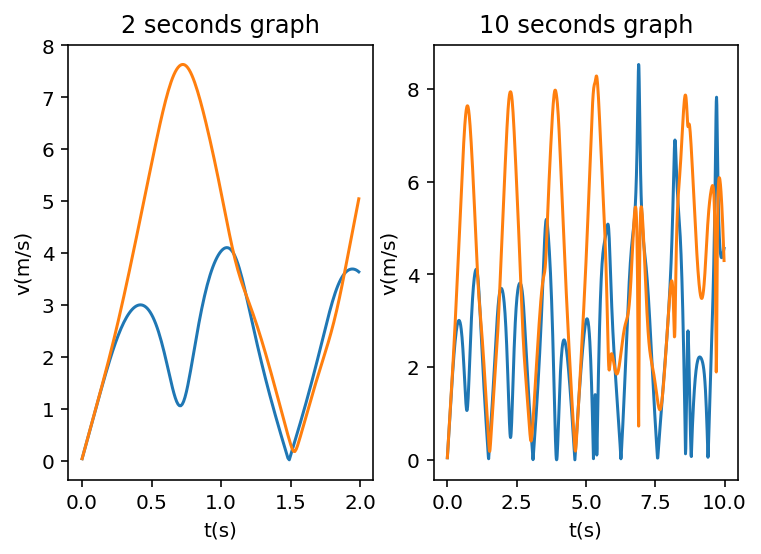

In [86]:
#פה יצרנו גרפים של תנועת מתותלת כפולה כפונקציה של זמן (הצבע הכחול מסמל את המטוטלת הראשונה והצבע הכתום מסמל את המטוטלת השנייה) 
movement = get_angular_velocity(mass_1,mass_2,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t)מציבים את פרמטרים הבסיסיים לפונקציה
x1 = movement[2]#מזמנים את מקומי המטוטלות בכל רגע
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []#יוצרים רשימה לציר איקס
movement1 = []#יוצרים שתי רשימות לציר וואי (אחת לכל מטוטלת)
movement2 = []
for i in range(len(x1)-1):#יוצרים לולאה החוזרת על עצמה כאורך הרשימות של המיקום פחות 1
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')
#שני הגרפים פה הם תוצאה של הצבת נתוני ברירת מחדל

Text(0.5, 1.0, '2 seconds graph')

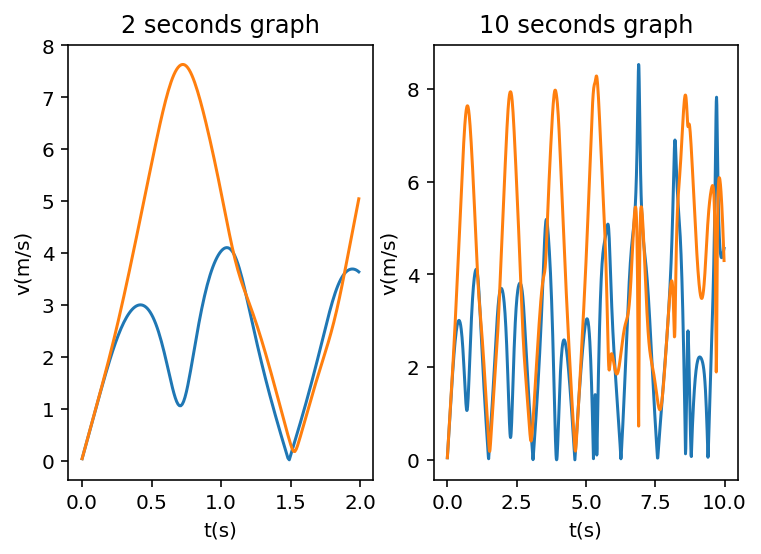

In [87]:
#בגרפים אלה בדקנו האם שינוי המסות של המטוטלות באותו היחס משפיע על תנועתם
#התכנות הוא בדיוק אותו התכנות כמו הקודם
movement = get_angular_velocity(1000,1000,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שהמטוטלות שוקלות טון כל אחת
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

Text(0.5, 1.0, '2 seconds graph')

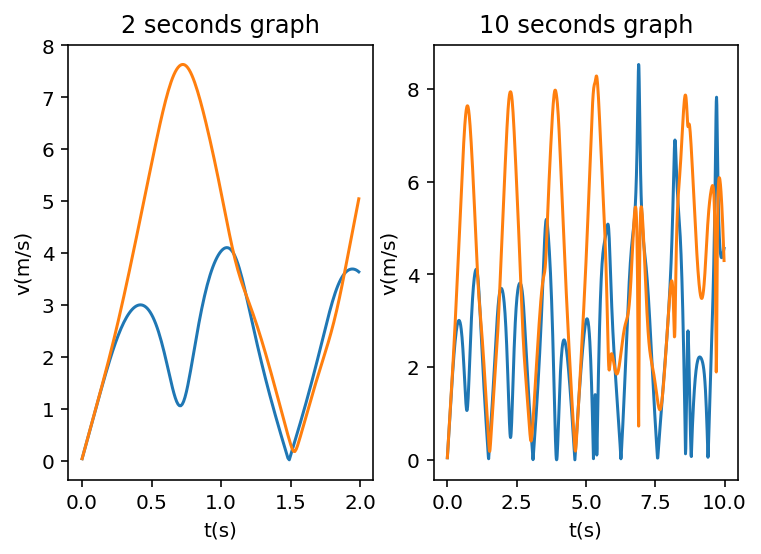

In [88]:
movement = get_angular_velocity(0.001,0.001,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שהמטוטלות שוקלות גרם כל אחת
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

In [89]:
#ניתן להסיק מן ארבעת הגרפים האחרונים ששינוי המסות של המטוטלות כאשר הם שוות אינו משפיע על תנועת המטוטלת משום שהכוח שמשפיעה מטוטלת אחת על האחרת שווה גם כן

Text(0.5, 1.0, '2 seconds graph')

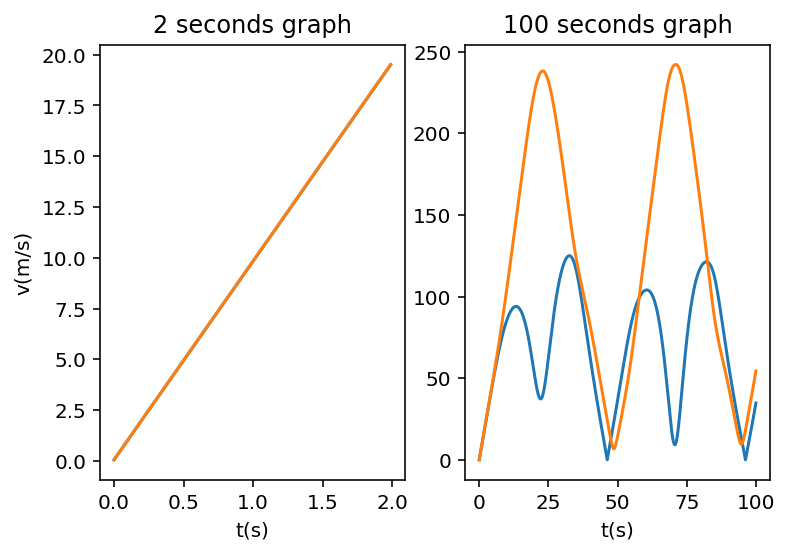

In [90]:
#כאן בדקנו האם שינוי אורכי המטוטלות ביחס זהה משפיע על תנועת המטוטלת
movement = get_angular_velocity(mass_1,mass_2,1000,1000,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend*10)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שאורך כל מטוטלת הוא קילומטר
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('100 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

Text(0.5, 1.0, '2 seconds graph')

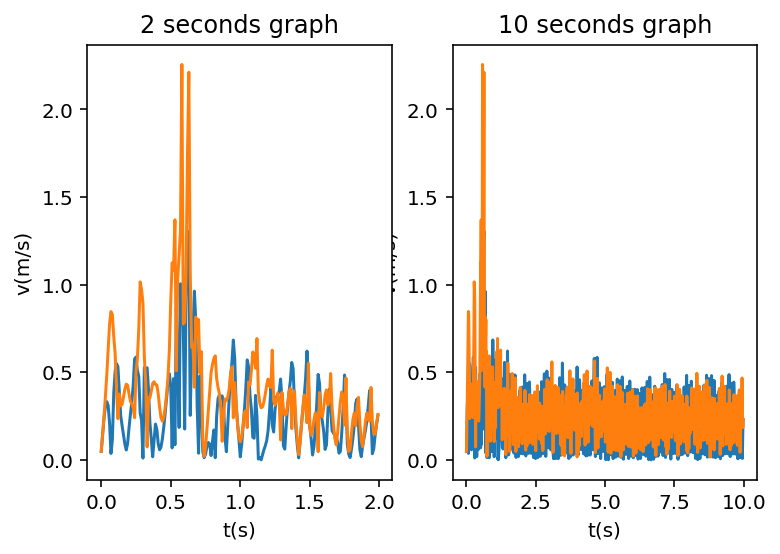

In [91]:
movement = get_angular_velocity(mass_1,mass_2,0.01,0.01,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שאורך כל מטוטלת הוא מילימטר
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

In [92]:
#מארבעת הגרפים האחרונים ניתן להסיק שככל שאורך המטוטלות יותר ארוך כך יקח למטוטלת יותר זמן להגיע משיא המקסימום לשיא המינימום ולהפך ולכן יקח למטוטלת ארוכה יותר זמן לאפס את מהירותה ממטוטלת קצרה

Text(0.5, 1.0, '2 seconds graph')

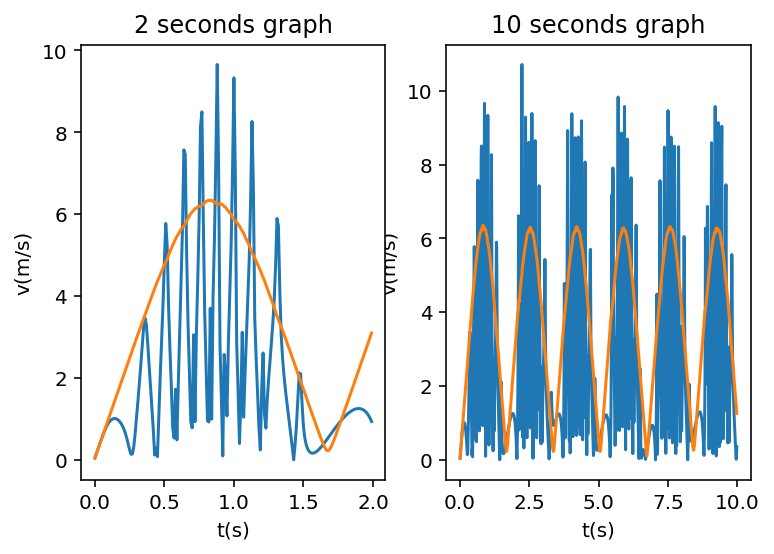

In [93]:
#כאן בדקנו איך שינוי ביחס בין המסות משפיע על תנועת המטוטלת
movement = get_angular_velocity(mass_1,100,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שהמטוטלת הראשונה שוקלת קילוגרם אחד והשנייה שוקלת 100 קילוגרם
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

Text(0.5, 1.0, '2 seconds graph')

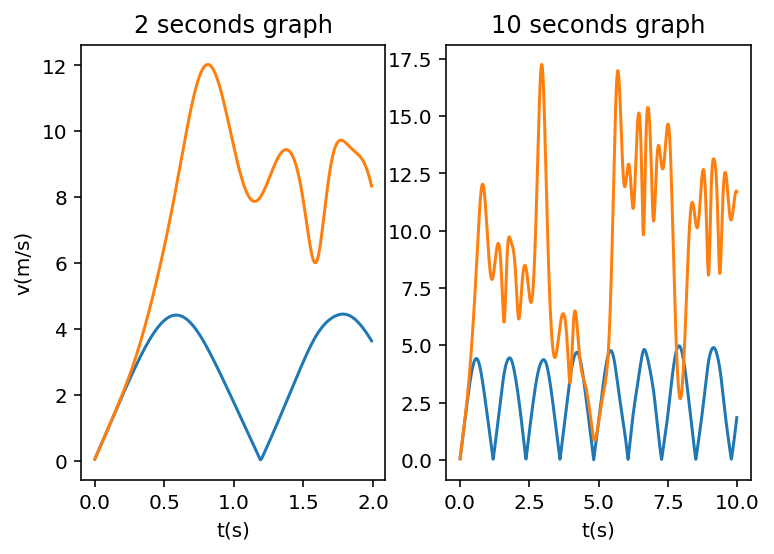

In [94]:
movement = get_angular_velocity(100,mass_2,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שהמטוטלת הראשונה שוקלת 100 קילוגרם והשנייה שוקלת רק קילו אחד
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

In [95]:
#ניתן להסיק מן ארבעת הגרפים האחרונים שככל שמסת אחת המטוטלות גדולה יותר מהאחרת היא תהיה פחות מושפעת מהמטוטלת האחרת ולכן למטוטלת הכבדה יותר יש גרף חלק יותר

Text(0.5, 1.0, '2 seconds graph')

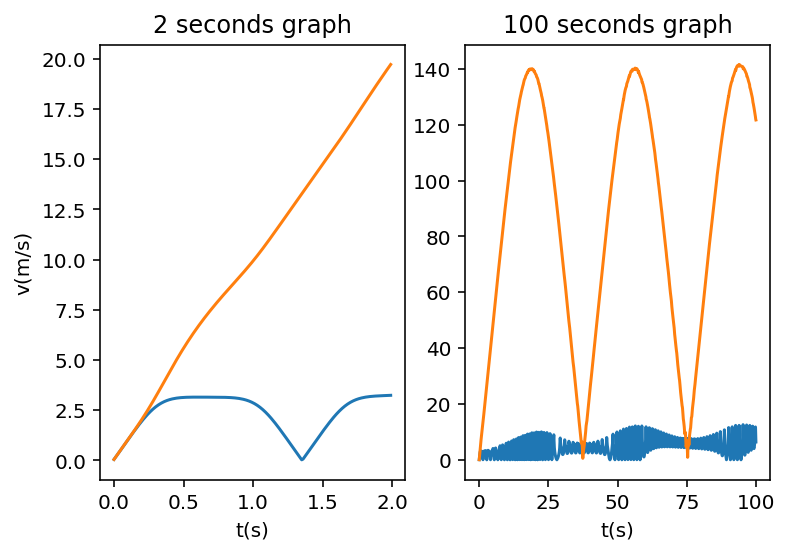

In [96]:
#כאן בדקנו איך שינוי ביחס בין אורכי המטוטלות משפיע על תנועתם
movement = get_angular_velocity(mass_1,mass_2,lenght_1,1000,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend*10)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שאורך המטוטלת הראשונה הוא מטר אחד ואורך השנייה הוא קילומטר
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('100 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

Text(0.5, 1.0, '2 seconds graph')

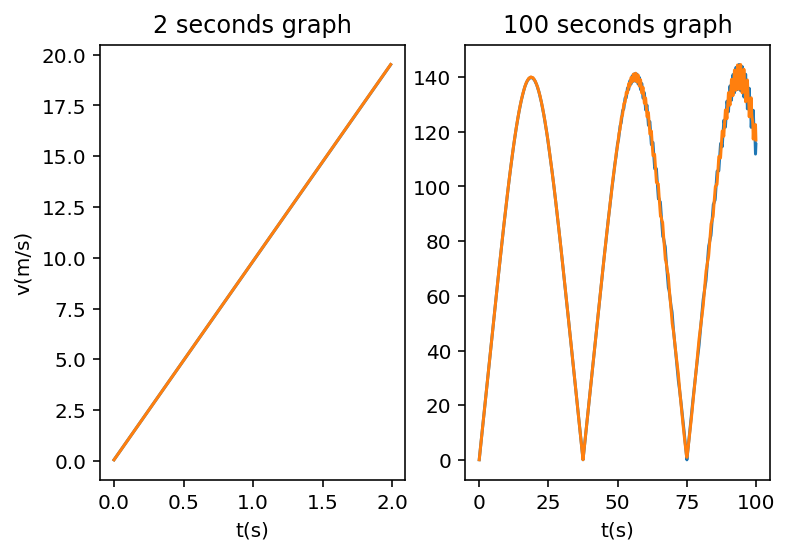

In [97]:
movement = get_angular_velocity(mass_1,mass_2,1000,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend*10)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שאורך המטוטלת הראשונה הוא קילומטר אחד ואורך השנייה הוא רק מטר
x1 = movement[2]
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []
movement1 = []
movement2 = []
for i in range(len(x1)-1):
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i/100)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס
plt.subplot(1,2,2)#מעצבים גרף ראשון 
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('100 seconds graph')
plt.subplot(1,2,1)#מעצבים גרף שני
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement1[b] for b in range(short_time_extend)])
plt.plot([(b*delta_time) for b in range(short_time_extend)] , [movement2[b] for b in range(short_time_extend)])
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('2 seconds graph')

In [98]:
#ניתן לראות מן ארבעת הגרפים האחרונים שכאשר המטוטלת הראשונה הרבה יותר ארוכה מהמטוטלת השנייה המטוטלת השנייה והמטוטלת הראשונה נופלים בערך אותו מרחק ולכן מהירותם כמעט זהה לחלוטין, אך כאשר המטוטלת השנייה הרבה יותר גדולה מהמטוטלת הראשונה המטוטלת השנייה נופלת בהרבה יותר מרחק מהמטוטלת הראשונה ולכן היא תיהיה יותר מהירה מהמטוטלת הראשונה  

Text(0.5, 1.0, '2 seconds graph')

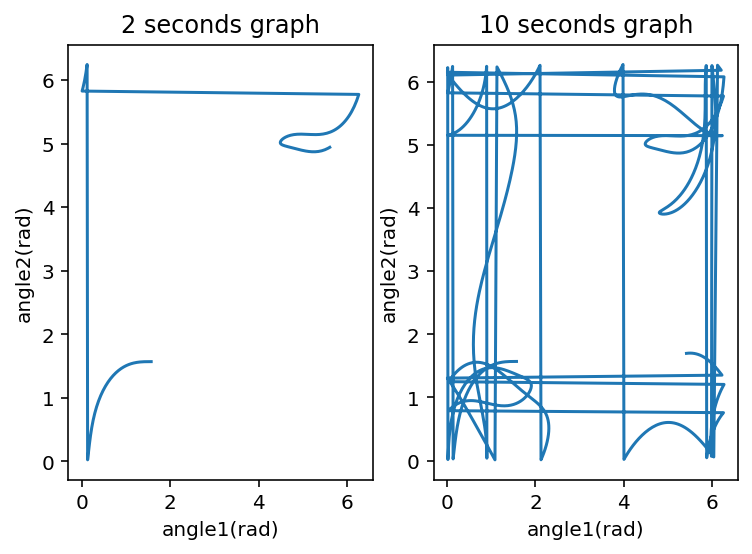

In [21]:
#כאן בדקנו את מרחב הפאזה (היחס בין הזוויות בין המטוטלות לאנך) ולכן יצרנו גרף בו ציר איקס הוא הזווית בין המטוטלת הראשונה לאנך וציר וואי הוא הזוויות בין המטוטלת השנייה לאנך
movement = get_angular_velocity(mass_1,mass_2,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) מציבים את פרמטרים הבסיסיים לפונקציה
nd1 = movement[6]#מזמנים את הזוויות בין המטוטלות לאנך
nd2 = movement[7]
d1 = []#יוצרים רשימות חדשות לזוויות
d2 = []
for i in range(len(nd2)):#יוצרים לולאה החוזרת על עצמה כאורך הרשימות של הזוויות 
    d1.append(nd1[i]%(2*pi))#מוסיפים לרשימות הזוויות החדשות את השארית של הזוויות חלקי שני פאי (360 מעלות ברדיאנים) כדי שבכל סיבוב הזוויות יאפסו את עצמן  
    d2.append(nd2[i]%(2*pi))
plt.subplot(1,2,2)#מעצבים גרפים
plt.plot(d1 , d2)
plt.xlabel('angle1(rad)')
plt.ylabel('angle2(rad)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)
plt.plot([d1[b] for b in range(short_time_extend)] , [d2[b] for b in range(short_time_extend)])
plt.xlabel('angle1(rad)')
plt.ylabel('angle2(rad)')
plt.title('2 seconds graph')

Text(0.5, 1.0, '2 seconds graph')

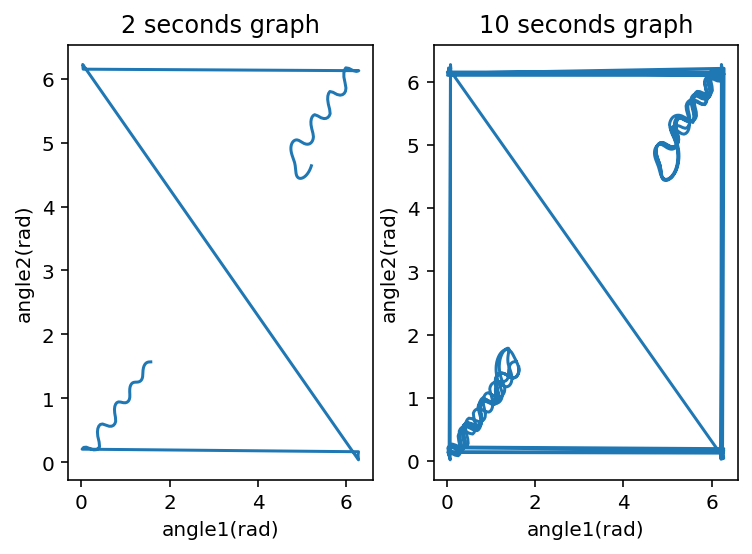

In [22]:
#כאן בדקנו איך שינוי היחס בין מסות המטוטלות ישפיע על מרחב הפאזה 
movement = get_angular_velocity(mass_1,100,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שמסת המטוטלת הראשונה היא קילוגרם אחד ומסת המטוטלת השנייה היא 100 קילוגרם
nd1 = movement[6]#מזמנים את הזוויות בין המטוטלות לאנך
nd2 = movement[7]
d1 = []#יוצרים רשימות חדשות לזוויות
d2 = []
for i in range(len(nd2)):#יוצרים לולאה החוזרת על עצמה כאורך הרשימות של הזוויות 
    d1.append(nd1[i]%(2*pi))#מוסיפים לרשימות הזוויות החדשות את השארית של הזוויות חלקי שני פאי (360 מעלות ברדיאנים) כדי שבכל סיבוב הזוויות יאפסו את עצמן  
    d2.append(nd2[i]%(2*pi))
plt.subplot(1,2,2)#מעצבים גרפים
plt.plot(d1 , d2)
plt.xlabel('angle1(rad)')
plt.ylabel('angle2(rad)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)
plt.plot([d1[b] for b in range(short_time_extend)] , [d2[b] for b in range(short_time_extend)])
plt.xlabel('angle1(rad)')
plt.ylabel('angle2(rad)')
plt.title('2 seconds graph')

Text(0.5, 1.0, '2 seconds graph')

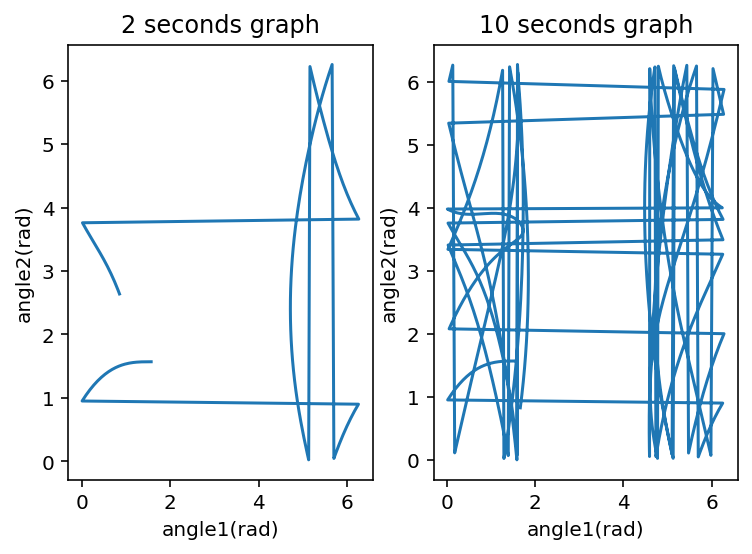

In [23]:
movement = get_angular_velocity(100,mass_2,lenght_1,lenght_2,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,long_time_extend)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t) כאן הצבנו שמסת המטוטלת הראשונה היא 100 קילוגרם אחד ומסת המטוטלת השנייה רק קילוגרם אחד
nd1 = movement[6]#מזמנים את הזוויות בין המטוטלות לאנך
nd2 = movement[7]
d1 = []#יוצרים רשימות חדשות לזוויות
d2 = []
for i in range(len(nd2)):#יוצרים לולאה החוזרת על עצמה כאורך הרשימות של הזוויות 
    d1.append(nd1[i]%(2*pi))#מוסיפים לרשימות הזוויות החדשות את השארית של הזוויות חלקי שני פאי (360 מעלות ברדיאנים) כדי שבכל סיבוב הזוויות יאפסו את עצמן  
    d2.append(nd2[i]%(2*pi))
plt.subplot(1,2,2)#מעצבים גרפים
plt.plot(d1 , d2)
plt.xlabel('angle1(rad)')
plt.ylabel('angle2(rad)')
plt.title('10 seconds graph')
plt.subplot(1,2,1)
plt.plot([d1[b] for b in range(short_time_extend)] , [d2[b] for b in range(short_time_extend)])
plt.xlabel('angle1(rad)')
plt.ylabel('angle2(rad)')
plt.title('2 seconds graph')

Text(0.5, 1.0, 'trail')

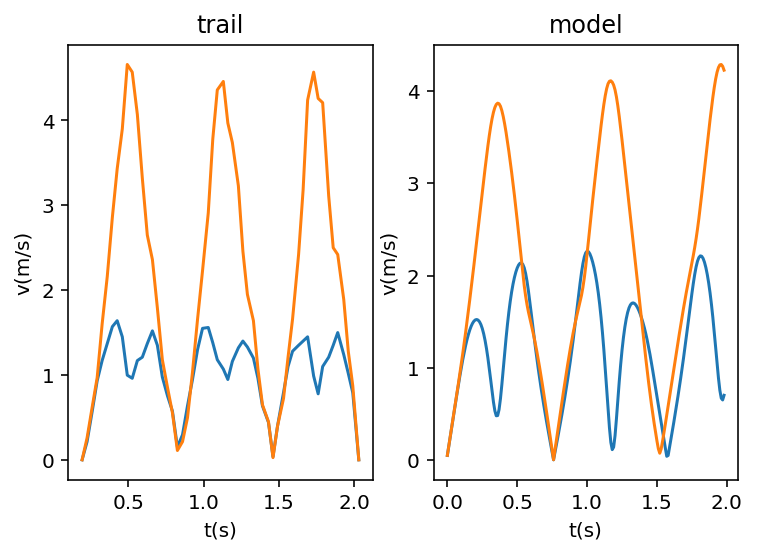

In [53]:
#השוואה בין הניסוי למודל החישובי, כאשר יחס המסות של במטוטלות הוא 1-1
movement = get_angular_velocity(0.1,0.1,0.25,0.25,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,2)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t)מציבים את פרמטרים הבסיסיים לפונקציה
x1 = movement[2]#מזמנים את מקומי המטוטלות בכל רגע
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []#יוצרים רשימה לציר איקס
movement1 = []#יוצרים שתי רשימות לציר וואי (אחת לכל מטוטלת)
movement2 = []
for i in range(len(x1)-1):#יוצרים לולאה החוזרת על עצמה כאורך הרשימות של המיקום פחות 1
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס 
plt.subplot(1,2,2)
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('model')
import csv
t=[]
v1=[]
v2=[]
file_name='/home/user/data/double_pendulum_1-1.csv'
file=open(file_name,'r')
data=list(csv.DictReader(file))
for key in data:
    ti=key.get("t[s]")
    t.append(float(ti))
    ve1=key.get("v1[m/s]")
    v1.append(float(ve1))
    ve2=key.get("v2[m/s]")
    v2.append(float(ve2))
plt.subplot(1,2,1)
plt.plot(t , v1)
plt.plot(t , v2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('trail')

Text(0.5, 1.0, 'trail')

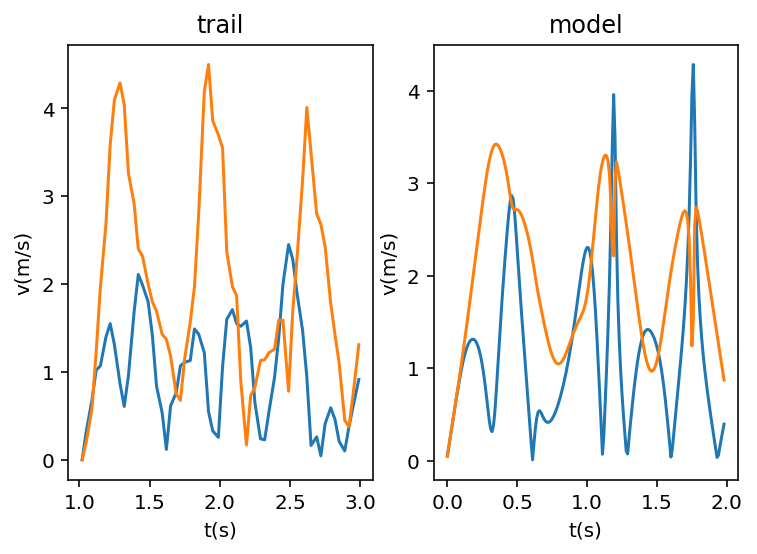

In [54]:
#השוואה בין הניסוי למודל החישובי, כאשר יחס המסות של במטוטלות הוא 1-2
movement = get_angular_velocity(0.1,0.2,0.25,0.25,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,2)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t)מציבים את פרמטרים הבסיסיים לפונקציה
x1 = movement[2]#מזמנים את מקומי המטוטלות בכל רגע
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []#יוצרים רשימה לציר איקס
movement1 = []#יוצרים שתי רשימות לציר וואי (אחת לכל מטוטלת)
movement2 = []
for i in range(len(x1)-1):#יוצרים לולאה החוזרת על עצמה כאורך הרשימות של המיקום פחות 1
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס 
plt.subplot(1,2,2)
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('model')
import csv
t=[]
v1=[]
v2=[]
file_name='/home/user/data/double_pendulum_1-2.csv'
file=open(file_name,'r')
data=list(csv.DictReader(file))
for key in data:
    ti=key.get("t[s]")
    t.append(float(ti))
    ve1=key.get("v1[m/s]")
    v1.append(float(ve1))
    ve2=key.get("v2[m/s]")
    v2.append(float(ve2))
plt.subplot(1,2,1)
plt.plot(t , v1)
plt.plot(t , v2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('trail')

Text(0.5, 1.0, 'trail')

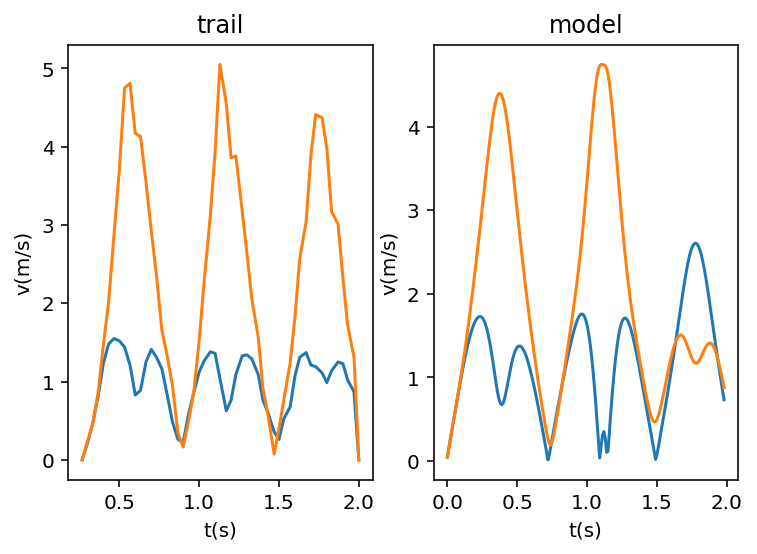

In [55]:
#השוואה בין הניסוי למודל החישובי, כאשר יחס המסות של במטוטלות הוא 2-1
movement = get_angular_velocity(0.2,0.1,0.25,0.25,angle_1,angle_2,angular_velocity_1,angular_velocity_2,delta_time,gravity,2)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t)מציבים את פרמטרים הבסיסיים לפונקציה
x1 = movement[2]#מזמנים את מקומי המטוטלות בכל רגע
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]
x = []#יוצרים רשימה לציר איקס
movement1 = []#יוצרים שתי רשימות לציר וואי (אחת לכל מטוטלת)
movement2 = []
for i in range(len(x1)-1):#יוצרים לולאה החוזרת על עצמה כאורך הרשימות של המיקום פחות 1
    movement1.append(((x1[i+1]-x1[i])**2+(y1[i+1]-y1[i])**2)**0.5/delta_time)#מחשבים את המהירויות הקוויות של המטוטלות ומוסיפים לרשימות 
    movement2.append(((x2[i+1]-x2[i])**2+(y2[i+1]-y2[i])**2)**0.5/delta_time)
    x.append(i*delta_time)#מוסיפים את מספר המחזור של הלולאה אל הרשימה של ציר איקס 
plt.subplot(1,2,2)
plt.plot(x , movement1)
plt.plot(x , movement2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('model')
import csv
t=[]
v1=[]
v2=[]
file_name='/home/user/data/double_pendulum_2-1.csv'
file=open(file_name,'r')
data=list(csv.DictReader(file))
for key in data:
    ti=key.get("t[s]")
    t.append(float(ti))
    ve1=key.get("v1[m/s]")
    v1.append(float(ve1))
    ve2=key.get("v2[m/s]")
    v2.append(float(ve2))
plt.subplot(1,2,1)
plt.plot(t , v1)
plt.plot(t , v2)
plt.xlabel('t(s)')
plt.ylabel('v(m/s)')
plt.title('trail')

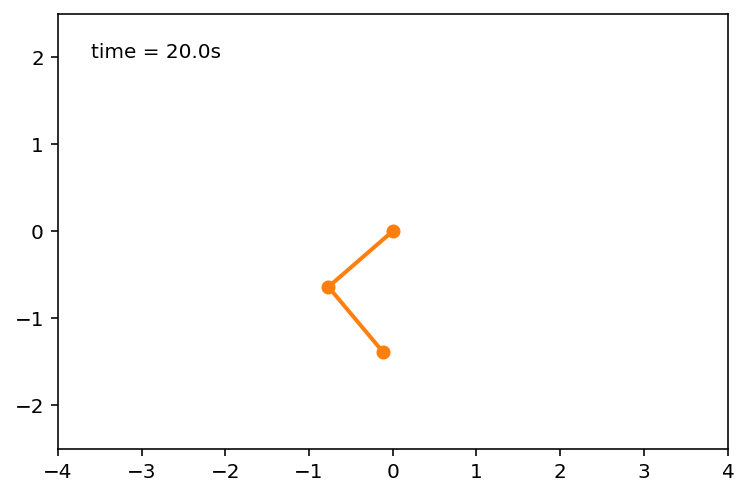

In [84]:
import numpy as np
from matplotlib.animation import FuncAnimation

movement = get_angular_velocity(mass_1,mass_2,lenght_1,lenght_1,135,180,angular_velocity_1,angular_velocity_2,delta_time,gravity,20)#(m1,m2,l1,l2,d10,d20,w01,w02,dt,g,t)מציבים את פרמטרים הבסיסיים לפונקציה
x1 = movement[2]#מזמנים את מקומי המטוטלות בכל רגע
x2 = movement[3]
y1 = movement[4]
y2 = movement[5]


fig, ax = plt.subplots()
ax.set_xlim((-lenght_1-lenght_2-(lenght_1+lenght_2)/4)*8/5,(lenght_1+lenght_2+(lenght_1+lenght_2)/4)*8/5)
ax.set_ylim(-lenght_1-lenght_2-(lenght_1+lenght_2)/4,lenght_1+lenght_2+(lenght_1+lenght_2)/4)
line = ax.plot(x1[1],y1[1])

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animation_frame(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*delta_time))
    return line, time_text

animation = FuncAnimation(fig, func = animation_frame, frames = np.arange(1,len(y1)), interval = 100 , blit=True ,  init_func=init)
animation.save('double_pendulum.mp4', fps=100)
plt.show()

In [85]:
%%HTML
<video controls loop>
  <source src="double_pendulum.mp4" type="video/mp4" >
</video>